In [1]:
import os
import pandas as pd
import torch
from torch import Tensor
from typing import Tuple, List, Callable
import random
import warnings
warnings.filterwarnings("ignore")

import pdb
import time

torch.cuda.is_available()

True

In [2]:
gpu_ids = [1]

In [3]:
from run import *
from utils import *

In [17]:
### TIME_LIMITS and LRs are for simulatiom arguments 
TIME_LIMITS = {'mnist': 500, 'fashion mnist': 2000  , 'cifar 10': 5000, 'celeba': 500}
LRs         = {'mnist': 0.05, 'fashion mnist': 0.001, 'cifar 10': 0.001, 'celeba': 0.01}

In [18]:
dataset_name = 'fashion mnist'
lr = LRs[dataset_name]
time_limit = TIME_LIMITS[dataset_name]

In [19]:
### Here you should define different setups that you want to run and compare.
### Each config should be added to the "setups" dictionary. Config arguments are difined 
### by a dictionary from argument_name to value. 

setups = {}

group_count = 5
client_count = 20
max_local_steps = 5

server_interaction_time = 3

server_waiting_time = 5
## QuAFL config example

# method = "qsgd"
# q_levels = 16
# server_interaction_time *= 4 / 32
# server_interaction_time = float("{0:.3f}".format(server_interaction_time))
# quantizer = {"method": method, 'k': q_levels}
# server_waiting_time = 5
for log_k in [16]:
    method = "qsgd"
    server_interaction_time = 3
    # quant_q = 14
    server_interaction_time *= log_k / 32
    server_interaction_time = float("{0:.3f}".format(server_interaction_time))
    quantizer = {"method": method, 'k': 2**log_k}
    setups[f"QuAFL   ({client_count},{group_count},{max_local_steps},{method}: {log_k}) swt: {server_waiting_time} sit: {server_interaction_time}"] = {'algorithm': "quantized_fl", 
                                                                                              'client count': client_count,
                                                                                              'local step': max_local_steps,
                                                                                              'group count': group_count,
                                                                                              'quantizer': quantizer, 
                                                                                              'time_limit': time_limit,
                                                                                              'lr': lr,
                                                                                              'swt': server_waiting_time,
                                                                                              'sit': server_interaction_time,
                                                                                              'gpu_ids': gpu_ids}

quant_q = 16
for quant_s in [0.0001]:
    method = "lattice"
    server_interaction_time = 3
    # quant_q = 14
    server_interaction_time *= quant_q / 32                                   
    server_interaction_time = float("{0:.3f}".format(server_interaction_time))
    quantizer = {"method": method, 'quant_q': quant_q, 'quant_s': quant_s}
    setups[f"QuAFL   ({client_count},{group_count},{max_local_steps},{method}: {quant_q}, {quant_s}) swt: {server_waiting_time} sit: {server_interaction_time}"] = {'algorithm': "quantized_fl", 
                                                                                              'client count': client_count,
                                                                                              'local step': max_local_steps,
                                                                                              'group count': group_count,
                                                                                              'quantizer': quantizer, 
                                                                                              'time_limit': time_limit,
                                                                                              'lr': lr,
                                                                                              'swt': server_waiting_time,
                                                                                              'sit': server_interaction_time,
                                                                                              'gpu_ids': gpu_ids}

# method = "identity"
# quantizer = {"method": method}
# server_interaction_time = 3
# local_steps = max_local_steps
# setups[f"Fed-Avg ({client_count},{group_count},{local_steps}) sit: {server_interaction_time}"] = {'algorithm': "Fed_Avg", 
#                                                                                          'client count': client_count,
#                                                                                          'local step': local_steps,
#                                                                                          'group count': group_count,
#                                                                                          'quantizer': quantizer, 
#                                                                                          'time_limit': time_limit,
#                                                                                          'lr': lr,
#                                                                                          'sit': server_interaction_time,
#                                                                                          'gpu_ids': gpu_ids}
# method = "identity"
# server_interaction_time = 3
# quant_q = 32
# server_interaction_time *= quant_q / 32
# server_interaction_time = float("{0:.3f}".format(server_interaction_time))
# quantizer = {"method": method, 'quant_q': quant_q, 'quant_s': 0.001}
# setups[f"QuAFL   ({client_count},{group_count},{max_local_steps},{method}: {quant_q}) swt: {server_waiting_time} sit: {server_interaction_time}"] = {'algorithm': "quantized_fl", 
#                                                                                           'client count': client_count,
#                                                                                           'local step': max_local_steps,
#                                                                                           'group count': group_count,
#                                                                                           'quantizer': quantizer, 
#                                                                                           'time_limit': time_limit,
#                                                                                           'lr': lr,
#                                                                                           'swt': server_waiting_time,
#                                                                                           'sit': server_interaction_time,
#                                                                                           'gpu_ids': gpu_ids}



In [20]:
# torch.multiprocessing.set_sharing_strategy('file_system')

In [21]:
start = time.time()

log_period = 50 ## Simulation time difference between loggings.
logs, trainers = run(setups, dataset_name, log_period, count=client_count, decreasing=False, slow_client_ratio=0.5)

end = time.time()
print(f"Finished in {end - start}")

Slow client ratio is 0.5.
Setups run with constant lr.
Loading fashion mnist dataset.
--- QuAFL   (20,5,5,qsgd: 16) swt: 5 sit: 1.5 ---
Client 1 is added to the population as a slow client.
Client 2 is added to the population as a slow client.
Client 3 is added to the population as a slow client.
Client 4 is added to the population as a slow client.
Client 5 is added to the population as a slow client.
Client 6 is added to the population as a slow client.
Client 7 is added to the population as a slow client.
Client 8 is added to the population as a slow client.
Client 9 is added to the population as a slow client.
Client 10 is added to the population as a slow client.
Client 11 is added to the population as a fast client.
Client 12 is added to the population as a fast client.
Client 13 is added to the population as a fast client.
Client 14 is added to the population as a fast client.
Client 15 is added to the population as a fast client.
Client 16 is added to the population as a fast c

In [ ]:
dataset = "MNIST"
run_name = "lattice_qsgd_20000_const_0.05_quant_s"
# torch.save(logs, f"Results/{dataset}/{run_name}")

In [45]:
dataset = "MNIST"
run_name = "lattice_qsgd_20000_const_0.05_quant_s"
logs = torch.load(f"Results/{dataset}/{run_name}")

In [38]:
logs.keys()

dict_keys(['QuAFL   (20,5,3,qsgd: 14) swt: 5 sit: 1.312', 'QuAFL   (20,5,3,lattice: 14, 0.0001) swt: 5 sit: 1.312'])

In [22]:
new_logs = {}
for key in logs.keys():
    for token in ["0.0001"]:
        if token not in key:
            new_logs[key] = logs[key]
logs = new_logs

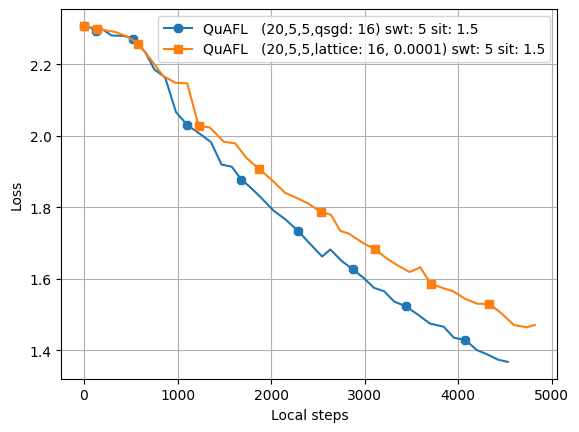

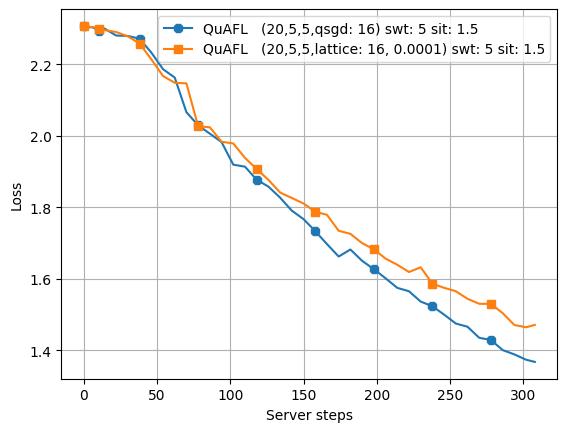

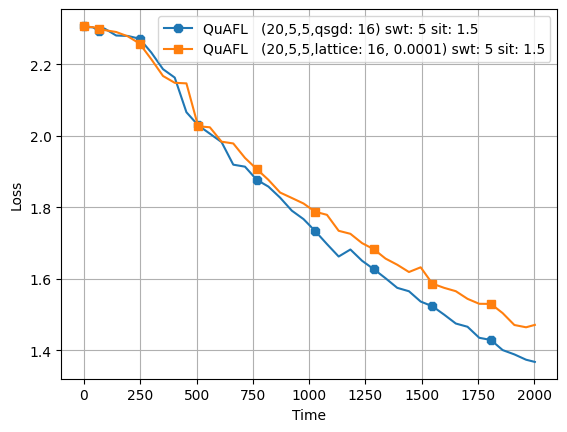

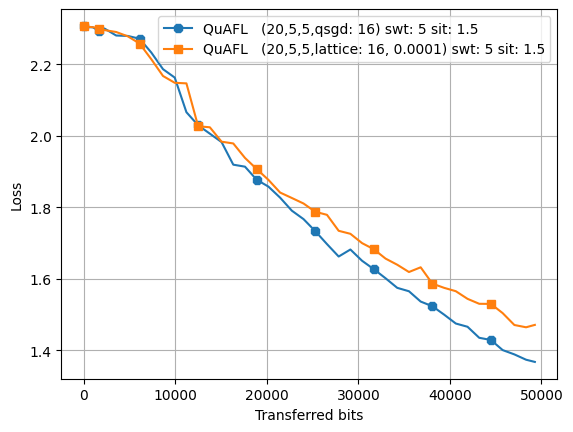

In [22]:

x_axis, y_axis = "Local steps", "Loss"
plot_trends(logs, x_axis, y_axis, 0)

x_axis, y_axis = "Server steps", "Loss"
plot_trends(logs, x_axis, y_axis, 0, 1100)

x_axis, y_axis = "Time", "Loss"
plot_trends(logs, x_axis, y_axis, 0) #, dataset_folder="Fashion MNIST", name="30_300_fashion_mnist"

x_axis, y_axis = "Transferred bits", "Loss"
plot_trends(logs, x_axis, y_axis, 0) #, dataset_folder="Fashion MNIST", name="30_300_fashion_mnist"


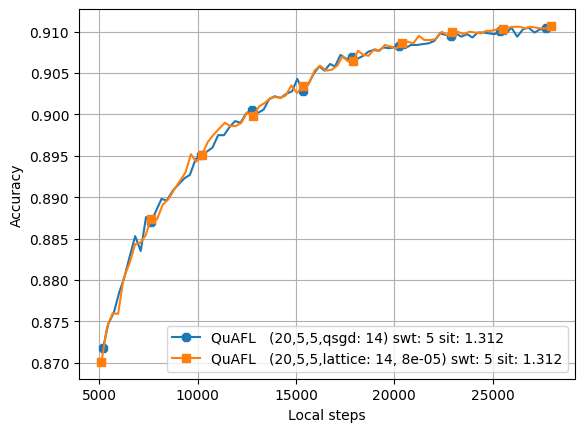

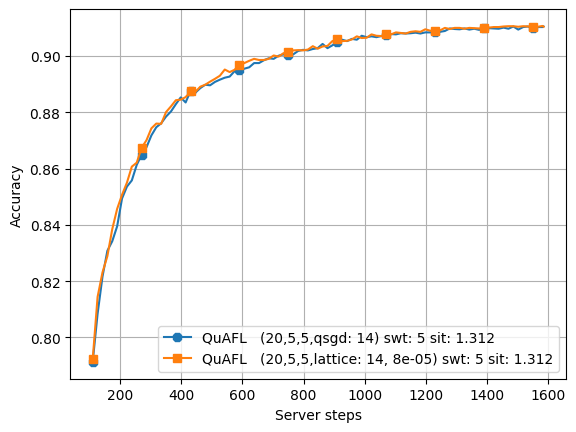

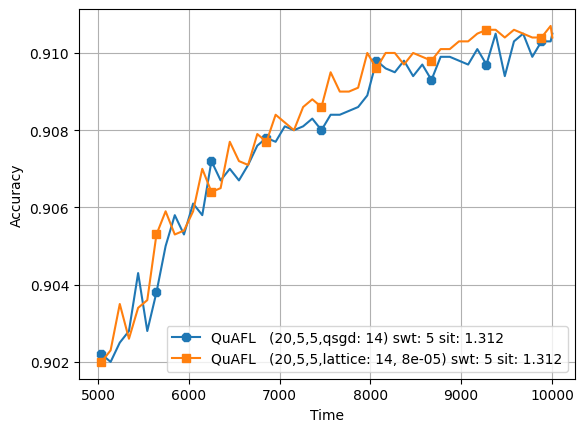

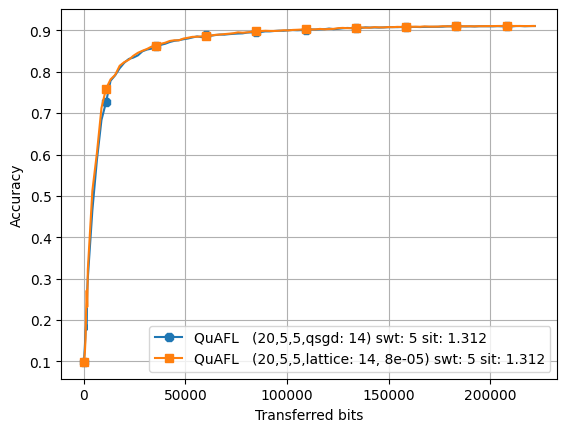

In [30]:
x_axis, y_axis = "Local steps", "Accuracy"
plot_trends(logs, x_axis, y_axis, 5000)

x_axis, y_axis = "Server steps", "Accuracy"
plot_trends(logs, x_axis, y_axis, 100)

x_axis, y_axis = "Time", "Accuracy"
plot_trends(logs, x_axis, y_axis, 5000) #, dataset_folder="Fashion MNIST", name="30_300_fashion_mnist"

x_axis, y_axis = "Transferred bits", "Accuracy"
plot_trends(logs, x_axis, y_axis) #, dataset_folder="Fashion MNIST", name="30_300_fashion_mnist"


In [11]:
logs

{'Fed-Avg (10,4,10) sit: 3 run:1': {'Loss': [tensor(2.3030),
   tensor(1.6653),
   tensor(1.1654),
   tensor(0.7346),
   tensor(0.6038),
   tensor(0.5190),
   tensor(0.4868),
   tensor(0.4750),
   tensor(0.4430),
   tensor(0.4253),
   tensor(0.4078),
   tensor(0.4170),
   tensor(0.3852),
   tensor(0.3933),
   tensor(0.3669),
   tensor(0.3651),
   tensor(0.3650),
   tensor(0.3477),
   tensor(0.3399),
   tensor(0.3780),
   tensor(0.3358),
   tensor(0.3308),
   tensor(0.3378)],
  'Accuracy': [tensor(0.1003),
   tensor(0.5941),
   tensor(0.6735),
   tensor(0.7532),
   tensor(0.7721),
   tensor(0.8087),
   tensor(0.8143),
   tensor(0.8214),
   tensor(0.8397),
   tensor(0.8473),
   tensor(0.8559),
   tensor(0.8474),
   tensor(0.8630),
   tensor(0.8570),
   tensor(0.8701),
   tensor(0.8704),
   tensor(0.8697),
   tensor(0.8756),
   tensor(0.8787),
   tensor(0.8598),
   tensor(0.8801),
   tensor(0.8808),
   tensor(0.8815)],
  'Time': [0,
   66.72961121055165,
   130.46339587759653,
   216.3759

In [53]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

def plot_trends(trends, x_axis, y_axis, start = 0, end = float('inf'), dataset_folder = None, name = None):
    
    fig, ax = plt.subplots(figsize=(6, 4))
    fig.set_facecolor('white')
    # ax.yaxis.set_major_locator(MultipleLocator(0.01))
    # ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    # ax.grid(which='major', color='#CCCCCC', linestyle='--')
    # ax.grid(which='minor', color='#CCCCCC', linestyle=':')
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.grid(True)
    shapes = ["8", "s", "p", "P", "*", "h", "H", "x", "d", "D"]
    
    for i , case in enumerate(trends):
        trend = trends[case]
        X, Y = trend[x_axis], trend[y_axis]
        Z = zip(X, Y)
        X, Y = [], []
        for z in Z:
            if z[0] >= start and z[0] <= end:
                X.append(z[0])
                Y.append(z[1])
        count = len(X)
        plt.plot(X, Y, marker=shapes[i%len(shapes)], label=case, markevery= math.ceil(count * 0.1))
    
    plt.legend()
    if name != None:
        plt.savefig(f'Results/{dataset_folder}/{name}_{y_axis}_{x_axis}.pdf') 
    plt.show()

In [47]:
# logs = torch.load("Results/Fashion MNIST/different_algos_30000_dec_lr_0.001")

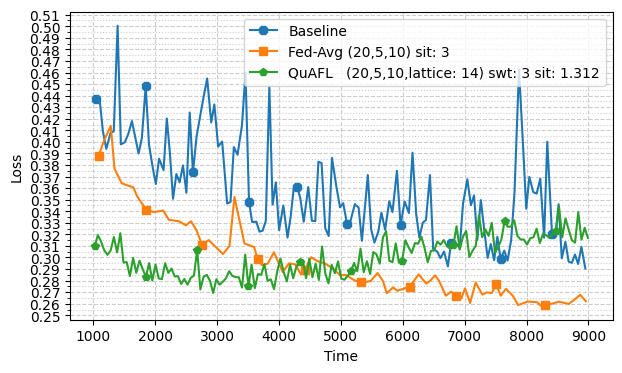

In [49]:
plot_trends(logs, "Time", "Loss", 1000, 9000, dataset_folder = "Fashion MNIST", name = "long_run_Adam_init_0.0005")

In [102]:
a = [2, 5, 2, 4, 5, 4]
a.sort(key=lambda x: x)
a

[2, 2, 4, 4, 5, 5]

In [18]:
b = [0]*20
b[3] += 1
b

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [88]:
quantizer = Lattice_Quantizer(20, 0.001)


In [93]:
A = torch.tensor(56.779)
B = torch.tensor(56.789)
quantized_A = quantizer.encode(A)

In [94]:
quantizer.decode(quantized_A, B)

tensor(56.7990)